## do the ood

In [9]:
%cd '/home/ubuntu/1.1Tdisk/vijay/TestingPackages'
from ood import OOD

/home/ubuntu/1.1Tdisk/vijay/TestingPackages


In [10]:
train_json = '/home/ubuntu/1.1Tdisk/vijay/walmart/dataset/training_valid_dataset/combined_data/train_val_combined/cluster_5.json'
test_json = '/home/ubuntu/1.1Tdisk/vijay/walmart/dataset/newstoredata/images/images.json'

In [11]:
model = OOD(train_json)

No of Images:  819


In [12]:
# plot reference data embeddings
model.plot_umap()

THRESHOLD: 28.241453990702844


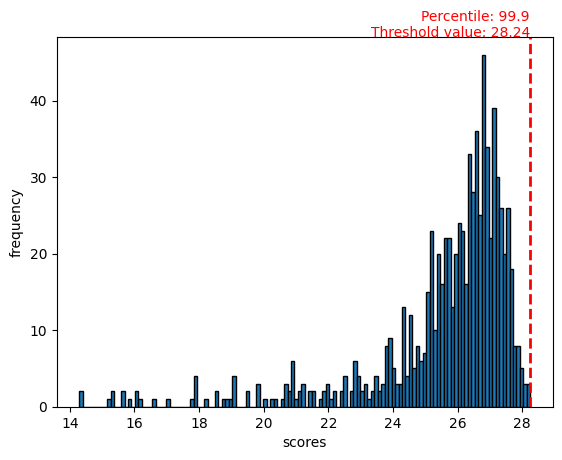

In [13]:
# score distribution for reference data and setting ood THRESHOLD
THRESHOLD = model.plot_score_histogram(percentile=99.9)

In [14]:
import json
with open(test_json, 'r') as f:
    test_data = json.load(f)
with open(train_json, 'r') as f:
    train_data = json.load(f)

test_embeddings = [d['embedding'] for d in test_data]
test_filepaths = [d['filepath'] for d in test_data]
train_embeddings = [d['embedding'] for d in train_data]
train_filepaths = [d['filepath'] for d in train_data]

In [15]:
test_ood_scores = model.calculate_ood_score(test_embeddings)

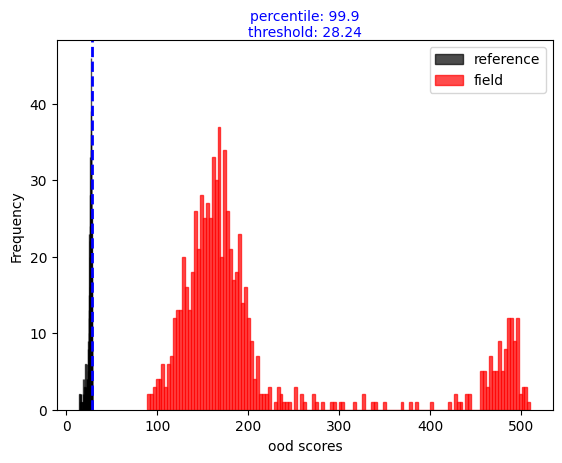

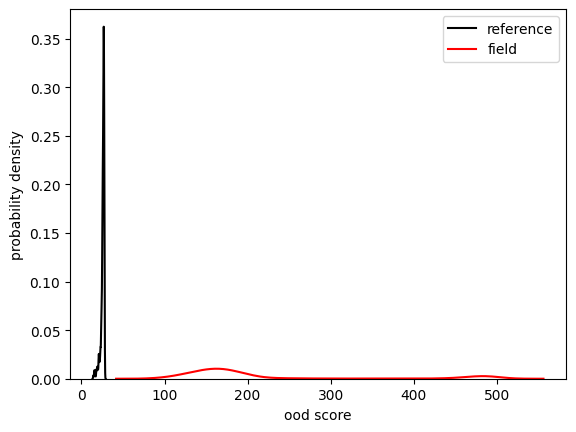

In [17]:
# plot ood drift between reference and field data
model.plot_ood_drift(test_ood_scores)

In [18]:
# plot the ood drift embeddings
embeddings = train_embeddings + test_embeddings
labels = ['train' for d in range(len(train_filepaths))] + ['ood' if s > THRESHOLD else 'ind' for s in test_ood_scores]

model.plot_umap(embeddings, labels)

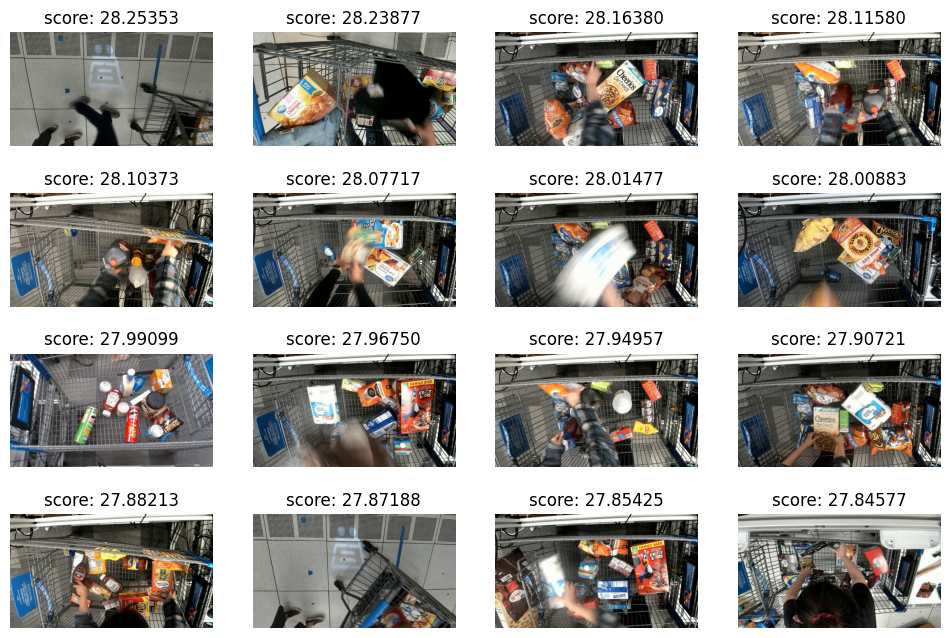

In [19]:
# plot top score from reference data
model.plot_top_ood(n_rows=4, n_cols=4, reverse=True)

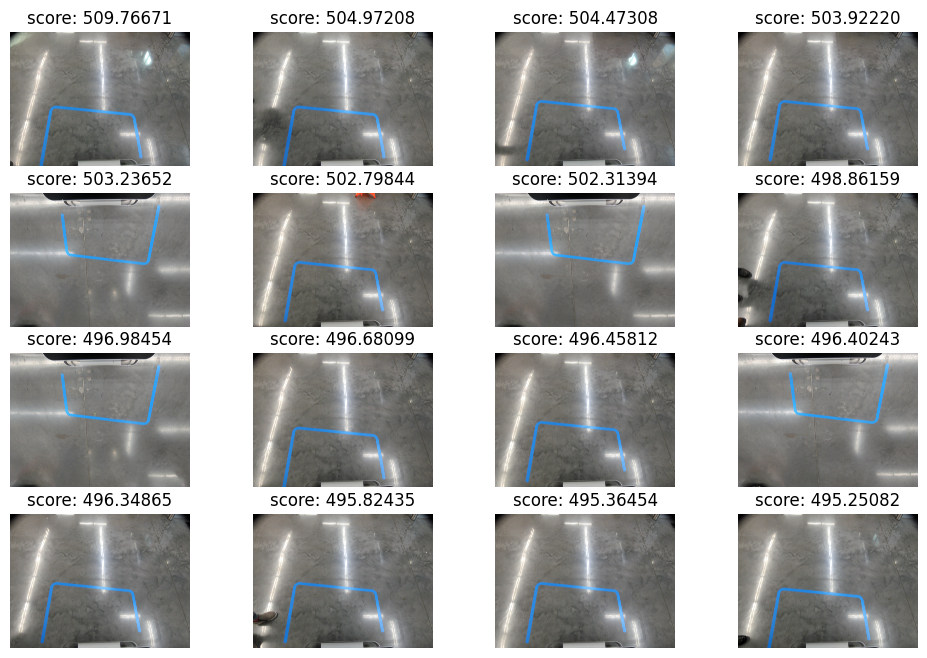

In [20]:
# plot top score from field data
model.plot_top_ood(n_rows=4, n_cols=4, data=(test_ood_scores, test_filepaths), reverse=True)

In [22]:
# save the field result csv

filepaths = test_filepaths
scores = test_ood_scores
save_path = '/home/ubuntu/1.1Tdisk/vijay/walmart/results_csv/ood_(train+val)_test.csv'
model.save_score_csv(filepaths, scores, save_path)

## do the drift

In [3]:
%cd '/home/ubuntu/1.1Tdisk/vijay/TestingPackages'
from DriftDetection import DriftDetector

/home/ubuntu/1.1Tdisk/vijay/TestingPackages


In [8]:
import json
import pandas as pd
import numpy as np

In [9]:
train_json = '/home/ubuntu/1.1Tdisk/vijay/walmart/dataset/training_valid_dataset/combined_data/train_val_combined/cluster_5.json'
test_json = '/home/ubuntu/1.1Tdisk/vijay/walmart/dataset/newstoredata/images/images.json'

with open(train_json, 'r') as f:
    train_data = json.load(f) 
    
with open(test_json, 'r') as f:
    test_data = json.load(f)
    
print(len(train_data), len(test_data))

819 772


In [10]:
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [11]:
metrics = [
            "euclidean_distance",
            "cosine_distance",
            "maximum_mean_discrepancy",
            "population_stability_index",
            "ks_test",
            "partial_wasserstein_distance",
        ]

reference_emb = np.array(train_df['embedding'].tolist())
test_emb = np.array(test_df['embedding'].tolist())
        
detector = DriftDetector(reference_emb)
detector.set_thresholds_for_all_metrics()

results = []
for metric in metrics:
    result = detector.is_drift(test_emb, metric)
    results.append(result)
            
fieldnames = ['is_drift', 'distance_metric_value', 'threshold_value_used', 'metric_used']
df = pd.DataFrame(results, columns=fieldnames)
df.head()

,is_drift,distance_metric_value,threshold_value_used,metric_used
0,True,0.391737,0.042966,euclidean_distance
1,True,0.102261,0.001158,cosine_distance
2,True,0.815580,0.634057,maximum_mean_discrepancy
3,True,11.757804,8.764344,population_stability_index
4,True,0.003543,0.001978,ks_test
